In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

print(train_images.shape)
print(test_images.shape)






(60000, 28, 28)
(10000, 28, 28)


In [2]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

print(train_images.shape)
print(test_images.shape)







(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
print(train_labels.shape)
print(test_labels.shape)








(60000, 10)
(10000, 10)


In [4]:
# Định nghĩa số class và định dạng đầu vào cho mô hình
num_classes = 10
input_shape = (28, 28, 1)
# định nghĩa hàm loss
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# định nghĩa thuật toán tối ưu
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [5]:
model = tf.keras.models.Sequential(
[
tf.keras.layers.Input(shape=input_shape),
tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
activation="relu", padding="same", strides=(1, 1)),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
activation="relu", padding="same", strides=(1, 1)),

tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(32, activation="relu"),
tf.keras.layers.Dense(num_classes, activation="softmax"),
]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,530 (466.91 KB)

 Trainable params: 119,530 (466.91 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
# khỏi tạo mô hình với loss, hàm tối ưu, và thông số đo hiệu suất của mô hình
model.compile(optimizer=optimizer,
loss=loss_fn,
metrics=['accuracy'])

# nơi lưu trữ file mô hình CNN
weights_filepath = './weights/model_checkpoint.keras'
# Tạo một callbback để lưu mô hình theo một cách mong muốn
callback = tf.keras.callbacks.ModelCheckpoint(filepath = weights_filepath, monitor='val_loss', verbose=1, save_best_only=True)

# bắt đầu training
his = model.fit(train_images, train_labels, epochs = 50, batch_size = 128, validation_split=0.2, callbacks=callback)

Epoch 1/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3045 - loss: 2.0346
Epoch 1: val_loss improved from inf to 0.53499, saving model to ./weights/model_checkpoint.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.3057 - loss: 2.0320 - val_accuracy: 0.8378 - val_loss: 0.5350
Epoch 2/50
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8610 - loss: 0.4748
Epoch 2: val_loss improved from 0.53499 to 0.37032, saving model to ./weights/model_checkpoint.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8611 - loss: 0.4744 - val_accuracy: 0.8857 - val_loss: 0.3703
Epoch 3/50
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9070 - loss: 0.3115
Epoch 3: val_loss improved from 0.37032 to 0.22952, saving model to ./weights/model_checkpoint.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9071 - loss: 0.3114 - val_accuracy: 0.9340 - val_loss: 0.2295
Epoch 4/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9273 - loss: 0.2450

In [9]:
import numpy as np
import tensorflow as tf
#load lại data
(train_images, train_labels), (test_images, test_labels) =tf.keras.datasets.mnist.load_data()
#load file mô hình
model =tf.keras.models.load_model('./weights/model_checkpoint.keras')
#kiểm tra mô hình đã load chính xác
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,532 (466.93 KB)

 Trainable params: 119,530 (466.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

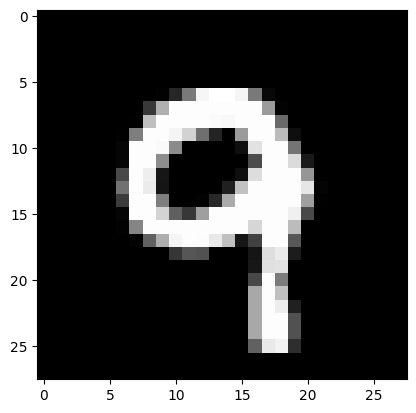

In [11]:
import matplotlib.pyplot as plt
#chọn một bức hình và vẽ nó lên
input_image = x_test[99]
plt.imshow(input_image, cmap=plt.get_cmap('gray'))
input_image = input_image/255.0

In [12]:
#chiều của bức ảnh test
print('shape của 1 bức ảnh', input_image.shape)
#shape của 1 bức ảnh (28, 28)
input_image = np.expand_dims(input_image, axis = 0)
# tăng thêm 1 chiều, định nghĩa cho số lượng mẫu
input_image = np.expand_dims(input_image, axis = 3)
# tăng thêm 1 chiều, định nghĩa cho số kênh màu ảnh
print('shape phù hợp với mô hình là 4 chiều', input_image.shape)
# shape phù hợp với mô hình là 4 chiều (1, 28, 28, 1)
output = model.predict(input_image)
print(output)
print('số dự đoán là :', output.argmax())

shape của 1 bức ảnh (28, 28)
shape phù hợp với mô hình là 4 chiều (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
[[7.2012509e-12 3.3509834e-11 1.0631941e-08 1.7016151e-05 7.0453422e-07
  4.4200423e-08 9.8629403e-12 1.3977816e-05 1.9323373e-07 9.9996805e-01]]
số dự đoán là : 9
